Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 1 cost: 0.070744829
Epoch: 2 cost: 0.037064063
Epoch: 3 cost: 0.030536127
Epoch: 4 cost: 0.028371455
Epoch: 5 cost: 0.027358041
Epoch: 6 cost: 0.026662218
Epoch: 7 cost: 0.026210915
Epoch: 8 cost: 0.025811743
Epoch: 9 cost: 0.025564941
Epoch: 10 cost: 0.025252079
Epoch: 11 cost: 0.025062262
Epoch: 12 cost: 0.024941737
Epoch: 13 cost: 0.024802295
Epoch: 14 cost: 0.024708238
Epoch: 15 cost: 0.024642923
Epoch: 16 cost: 0.024550769
Epoch: 17 cost: 0.024431712
Epoch: 18 cost: 0.024369079
Epoch: 19 cost: 0.024332356
Epoch: 20 cost: 0.024278289


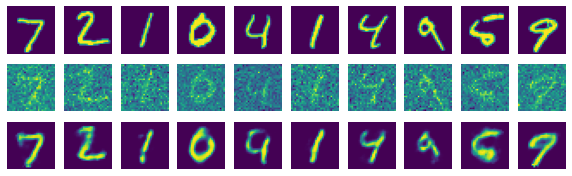

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Import mnist data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot = True)

# Initialize variabels
batch_size = 100
learning_rate = 0.01
epoch_num = 20
n_input = 28*28
n_hidden = 256
noise_level = 0.6

# Make model
keep_prob = tf.placeholder(tf.float32)

X_noisy = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32,[None, n_input])

# Make layer
# Encoding
W_encode = tf.Variable(tf.random_uniform([n_input, n_hidden], -1., 1.))
b_encode = tf.Variable(tf.random_uniform([n_hidden], -1., 1.))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X_noisy, W_encode), b_encode))

# Dropout
encoder = tf.nn.dropout(encoder, keep_prob)

# Decoding
W_decode = tf.Variable(tf.random_uniform([n_hidden, n_input], -1., 1.))
b_decode = tf.Variable(tf.random_uniform([n_input], -1., 1.))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

cost = tf.reduce_mean(tf.square(Y-decoder))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Learning data
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)

    for epoch in range(epoch_num):
        avg_cost = 0
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            batch_x_noisy = batch_xs + noise_level * np.random.normal(loc=0.0, scale=1.0, size=batch_xs.shape)
            _, cost_val = sess.run([optimizer, cost], feed_dict={X_noisy: batch_x_noisy, Y: batch_xs, keep_prob: 0.75})
            avg_cost += cost_val / total_batch
        print('Epoch:', '%d' % (epoch + 1), 'cost:', '{:.9f}'.format(avg_cost))

    test_X = mnist.test.images[:10] + noise_level * np.random.normal(loc=0.0, scale=1.0, size=mnist.test.images[:10].shape)

    # Plot data
    samples = sess.run(decoder, feed_dict={X_noisy: test_X, keep_prob: 1})
    fig, ax = plt.subplots(3, 10, figsize=(10, 3))

    for i in range(10):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[2][i].set_axis_off()
        ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        ax[1][i].imshow(np.reshape(test_X[i], (28, 28)))
        ax[2][i].imshow(np.reshape(samples[i], (28, 28)))
    plt.show()